In [ ]:
## Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
!pip install spacy
!python -m spacy download en          
import pandas as pd
import string
import spacy
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
%matplotlib inline

     |████████████████████████████████| 12.0 MB 27.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [29]:
data = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [30]:
data.drop(labels=['Unnamed: 0']	, axis=1,inplace=True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [31]:
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+","", text) # Remove Mentions
    text = re.sub(r"#","", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+","", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text
# Clean The Text
data["Text"] = data["Text"].apply(cleantext)
data

,Text
0,Im an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [32]:
# Calculating subjectivity and Polarity
# Function for subjectivity
from textblob import TextBlob
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# Function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

data_1 = data 
data_1['Subjectivity'] = data_1.Text.apply(calc_subj)
data_1['Polarity'] = data_1.Text.apply(calc_pola)

data_1.head(10)

,Text,Subjectivity,Polarity
0,Im an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
5,Happy New Year of the Ox!,0.727273,0.485227
6,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000
7,_ Haha thanks :),0.500000,0.300000
8,Indeed! Tweets definitely do not represent r...,0.500000,0.000000
9,The most entertaining outcome is the most likely,0.675000,0.375000


In [34]:
#Classifing these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
data_1['Sentiment'] = data_1.Polarity.apply(sentiment)
data_1.head(10)

,Text,Subjectivity,Polarity,Sentiment
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Netural
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Netural
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
5,Happy New Year of the Ox!,0.727273,0.485227,Positive
6,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000,Netural
7,_ Haha thanks :),0.500000,0.300000,Positive
8,Indeed! Tweets definitely do not represent r...,0.500000,0.000000,Netural
9,The most entertaining outcome is the most likely,0.675000,0.375000,Positive


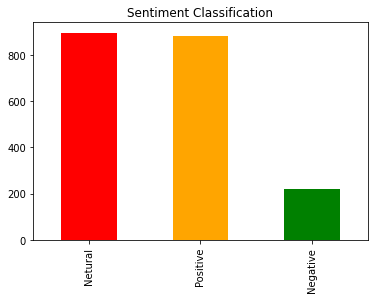

Netural     896
Positive    884
Negative    219
Name: Sentiment, dtype: int64


In [35]:
# see how many ratio of sentiment
colorsss=['red','orange','green']
data_1.Sentiment.value_counts().plot(kind='bar', color=colorsss)
plt.title('Sentiment Classification')
plt.show()
print(data.Sentiment.value_counts())

In [36]:
data = [Text.strip() for Text in data['Text']]     # Removing all space at the beginning and at the end of the string
data = [Text for Text in data if Text]             # Removing empty string because it consider as false in python
data

['I\x92m an alien',
 '_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 '_   Haha thanks :)',
 'Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 'Just sent some',
 'Just agree to do Clubhouse with',
 'It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 'He definitely has issues, but the sentencing seems a bit high',
 'Thanks for fixing',
 'Please unlock my account',
 '<U+0001F923><U+0001F923>',
 'This is true power haha',
 'Any crypto wallet that won\x92t give you your private keys should be avoided at all costs',
 'Your app sucks',
 ': NASA has selected Falcon Heavy to launch the first 

In [37]:
# NLP English language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [39]:
#Join the text
data=' '.join(data)
data

'I\x92m an alien _AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. _   Haha thanks :) Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923><U+0001F923> This is true power haha Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! Yes _ Once we can predict 

In [40]:
# Remove Punctuations 
no_punc_data=data.translate(str.maketrans('','',string.punctuation))
no_punc_data

'I\x92m an alien AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge\nAll thought he would fail\nHimself most of all    Haha thanks  Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923U0001F923 This is true power haha Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes  Once we can predict cash flow reasonably well Star

In [41]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
#Tokenization
from nltk.tokenize import word_tokenize
data_tokens=word_tokenize(no_punc_data)
print(data_tokens)
print(len(data_tokens))

['I\x92m', 'an', 'alien', 'AACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'P

In [53]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
stp_word = pd.read_csv('stop.txt',sep ='\t')

no_stop_tokens = [word for word in data_tokens if not word in stp_word]
print(no_stop_tokens)

['I\x92m', 'an', 'alien', 'AACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Please', 'u

In [54]:
doc=(' '.join(no_stop_tokens))
print(doc)

Im an alien AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge All thought he would fail Himself most of all Haha thanks Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with Its getting real Bought some Dogecoin for lil X so he can be toddler hodler He definitely has issues but the sentencing seems bit high Thanks for fixing Please unlock my account U0001F923U0001F923 This is true power haha Any crypto wallet that wont give you your private keys should be avoided at all costs Your app sucks NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well Starlink will IPO Starlink

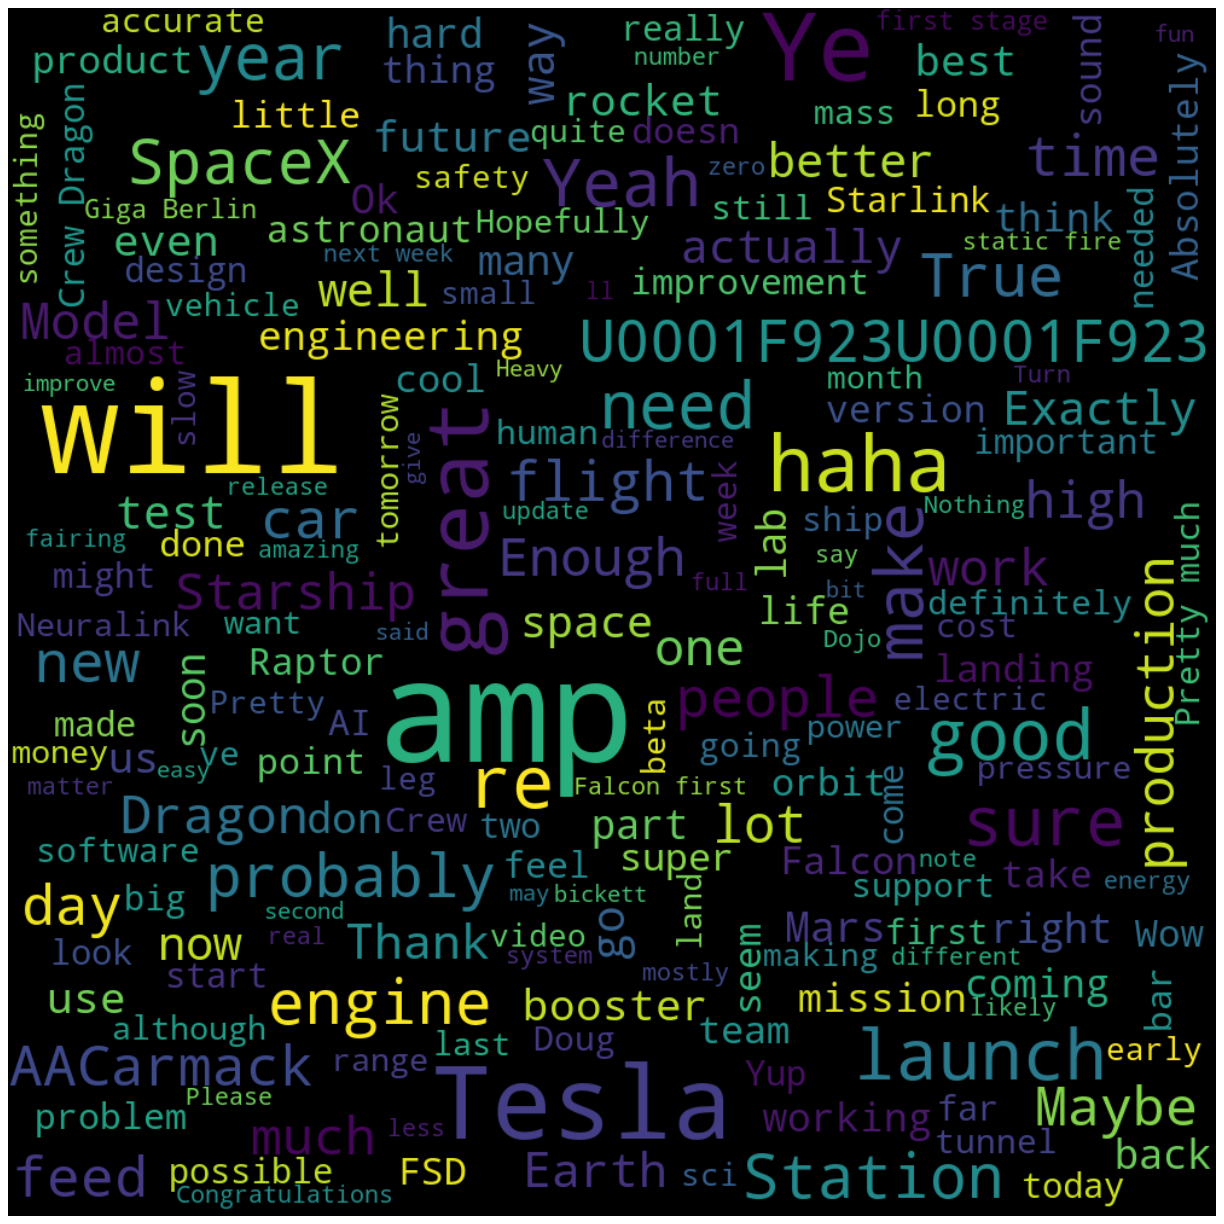

In [55]:
from wordcloud import WordCloud
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(doc)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()